In [57]:
import pandas as pd

df = pd.read_csv('apt_price.csv',
                 encoding='UTF-8',
                 header=0)
df = df.drop(columns=['Unnamed: 0'])

display(df.head())
df.shape

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,주택유형
0,1,경기도 수원시 영통구 매탄동,176,176,0,현대힐스테이트,75.814,202312,31,"53,000",...,3,-,-,2006,권광로260번길 36,-,중개거래,경기 수원시영통구,24.02.28,아파트
1,2,경기도 의정부시 호원동,308-139,308,139,회룡역풍림아이원,84.990,202312,31,"50,000",...,12,-,-,2007,외미로 64,-,중개거래,경기 의정부시,24.02.20,아파트
2,3,경기도 의정부시 호원동,308-139,308,139,회룡역풍림아이원,84.990,202312,31,"50,000",...,12,-,-,2007,외미로 64,20240102,중개거래,경기 의정부시,-,아파트
3,4,경기도 성남시 중원구 금광동,3950,3950,0,삼익금광1차,44.010,202312,31,"39,500",...,2,-,-,1991,자혜로16번길 9,-,중개거래,경기 성남시중원구,24.03.08,아파트
4,5,경기도 성남시 중원구 여수동,602,602,0,산들마을2단지,51.930,202312,31,"60,000",...,1,-,-,2015,여수울로 51,-,중개거래,경기 성남시중원구,24.03.29,아파트


(2720067, 21)

In [58]:
# 필터링할 지역 리스트 생성
target_areas = [
    '경기도 성남시 분당구 야탑동',
    '경기도 성남시 분당구 이매동',
    '경기도 성남시 분당구 서현동',
    '경기도 성남시 분당구 분당동',
    '경기도 성남시 분당구 수내동',
    '경기도 성남시 분당구 정자동',
    '경기도 성남시 분당구 금곡동',
    '경기도 성남시 분당구 구미동',
    '경기도 고양시 일산동구 식사동',
    '경기도 고양시 일산동구 중산동',
    '경기도 고양시 일산동구 정발산동',
    #'경기도 고양시 일산동구 풍산동',
    '경기도 고양시 일산동구 백석동',
    '경기도 고양시 일산동구 마두동',
    '경기도 고양시 일산동구 장항동',
    '경기도 고양시 일산서구 일산동',
    '경기도 고양시 일산서구 주엽동',
    '경기도 고양시 일산서구 대화동',
    '경기도 고양시 일산서구 탄현동'
    '경기도 성남시 분당구 판교동',
    '경기도 성남시 분당구 백현동',
    '경기도 성남시 분당구 삼평동',
    '경기도 성남시 분당구 운중동',
    '경기도 성남시 분당구 하산운동',
]

# 시군구 컬럼이 target_areas에 포함된 데이터만 필터링
filtered_df = df[df['시군구'].isin(target_areas)]

# 거래금액 기준으로 정렬
# filtered_df = filtered_df.sort_values('거래금액(만원)', ascending=False)

# 결과 출력
display(filtered_df.head())
print(filtered_df.shape)

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,주택유형
136,137,경기도 성남시 분당구 삼평동,722,722,0,봇들마을3단지(주공),59.8400,202312,30,"115,600",...,8,-,-,2009,동판교로 225,-,중개거래,경기 성남시 분당구,24.03.15,아파트
138,139,경기도 성남시 분당구 정자동,180,180,0,미켈란쉐르빌,21.2900,202312,30,"29,500",...,7,-,-,2003,정자일로 100,-,직거래,-,24.01.16,아파트
142,143,경기도 성남시 분당구 백현동,608,608,0,THESHARP판교퍼스트파크,84.9746,202312,30,"122,000",...,17,-,-,2021,판교백현로 38,-,중개거래,", 경기 성남시분당구",24.03.07,아파트
173,174,경기도 고양시 일산서구 주엽동,136,136,0,문촌마을13단지대우,74.4600,202312,30,"39,300",...,8,-,-,1995,중앙로 1471,20240313,중개거래,경기 고양시일산동구,-,아파트
297,298,경기도 고양시 일산동구 중산동,1575-4,1575,4,중산마을11(현대),84.3600,202312,29,"30,500",...,2,-,-,1995,탄중로 385,-,중개거래,경기 고양시일산동구,24.03.06,아파트


(199083, 21)


In [59]:
# 결측값 탐색
missing_values = filtered_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# 결측값 처리 (예: 결측값을 0으로 대체)
# filtered_df = filtered_df.fillna(0)

Missing values in each column:
 NO          0
시군구         0
번지          0
본번          0
부번          0
단지명         0
전용면적(㎡)     0
계약년월        0
계약일         0
거래금액(만원)    0
동           0
층           0
매수자         0
매도자         0
건축년도        0
도로명         0
해제사유발생일     0
거래유형        0
중개사소재지      0
등기일자        0
주택유형        0
dtype: int64


In [60]:
# 중복값 탐색
duplicate_rows = filtered_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# 중복값 제거
# filtered_df = filtered_df.drop_duplicates()

Number of duplicate rows: 0


In [61]:
# '거래금액(만원)' 컬럼을 숫자로 변환
filtered_df['거래금액(만원)'] = pd.to_numeric(filtered_df['거래금액(만원)'].str.replace(',', ''), errors='coerce')

# 이상치 탐색 (예: 거래금액이 0 이하인 경우)
outliers = filtered_df[filtered_df['거래금액(만원)'] <= 0]
print("Outliers:\n", outliers)

# 이상치 제거 (예: 거래금액이 0 이하인 경우 제거)
# filtered_df = filtered_df[filtered_df['거래금액(만원)'] > 0]

# 결과 출력
display(filtered_df.head())
print(filtered_df.shape)

Outliers:
 Empty DataFrame
Columns: [NO, 시군구, 번지, 본번, 부번, 단지명, 전용면적(㎡), 계약년월, 계약일, 거래금액(만원), 동, 층, 매수자, 매도자, 건축년도, 도로명, 해제사유발생일, 거래유형, 중개사소재지, 등기일자, 주택유형]
Index: []

[0 rows x 21 columns]


C:\Users\twoimo\AppData\Local\Temp\ipykernel_21536\2048141451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['거래금액(만원)'] = pd.to_numeric(filtered_df['거래금액(만원)'].str.replace(',', ''), errors='coerce')


,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자,주택유형
136,137,경기도 성남시 분당구 삼평동,722,722,0,봇들마을3단지(주공),59.8400,202312,30,115600,...,8,-,-,2009,동판교로 225,-,중개거래,경기 성남시 분당구,24.03.15,아파트
138,139,경기도 성남시 분당구 정자동,180,180,0,미켈란쉐르빌,21.2900,202312,30,29500,...,7,-,-,2003,정자일로 100,-,직거래,-,24.01.16,아파트
142,143,경기도 성남시 분당구 백현동,608,608,0,THESHARP판교퍼스트파크,84.9746,202312,30,122000,...,17,-,-,2021,판교백현로 38,-,중개거래,", 경기 성남시분당구",24.03.07,아파트
173,174,경기도 고양시 일산서구 주엽동,136,136,0,문촌마을13단지대우,74.4600,202312,30,39300,...,8,-,-,1995,중앙로 1471,20240313,중개거래,경기 고양시일산동구,-,아파트
297,298,경기도 고양시 일산동구 중산동,1575-4,1575,4,중산마을11(현대),84.3600,202312,29,30500,...,2,-,-,1995,탄중로 385,-,중개거래,경기 고양시일산동구,24.03.06,아파트


(199083, 21)


In [62]:
# 데이터프레임의 컬럼 출력
print(df.columns)

Index(['NO', '시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일',
       '거래금액(만원)', '동', '층', '매수자', '매도자', '건축년도', '도로명', '해제사유발생일', '거래유형',
       '중개사소재지', '등기일자', '주택유형'],
      dtype='object')


In [63]:
# 리스트로 여러 컬럼 지정
filtered_df = filtered_df.drop([
    'NO', '본번', '부번', '계약일', '동', '층', '매수자', '매도자', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지', '등기일자','주택유형'], axis=1, inplace=False)
display(filtered_df.head())
filtered_df.shape

,시군구,번지,단지명,전용면적(㎡),계약년월,거래금액(만원)
136,경기도 성남시 분당구 삼평동,722,봇들마을3단지(주공),59.8400,202312,115600
138,경기도 성남시 분당구 정자동,180,미켈란쉐르빌,21.2900,202312,29500
142,경기도 성남시 분당구 백현동,608,THESHARP판교퍼스트파크,84.9746,202312,122000
173,경기도 고양시 일산서구 주엽동,136,문촌마을13단지대우,74.4600,202312,39300
297,경기도 고양시 일산동구 중산동,1575-4,중산마을11(현대),84.3600,202312,30500


(199083, 6)

In [64]:
# 필터링할 지역 리스트 생성
target_bundang = [
    '경기도 성남시 분당구 야탑동',
    '경기도 성남시 분당구 이매동',
    '경기도 성남시 분당구 서현동',
    '경기도 성남시 분당구 분당동',
    '경기도 성남시 분당구 수내동',
    '경기도 성남시 분당구 정자동',
    '경기도 성남시 분당구 금곡동',
    '경기도 성남시 분당구 구미동',
]

# 시군구 컬럼이 target_areas에 포함된 데이터만 필터링
bundang_df = filtered_df[filtered_df['시군구'].isin(target_bundang)]
display(bundang_df.head())
bundang_df.shape

# 계약년월이 2007인 데이터만 필터링
# bundang_df_2007 = bundang_df[(bundang_df['계약년월'] // 100) == 2007]
# display(bundang_df_2007)
# bundang_df_2007.shape

,시군구,번지,단지명,전용면적(㎡),계약년월,거래금액(만원)
138,경기도 성남시 분당구 정자동,180,미켈란쉐르빌,21.290,202312,29500
401,경기도 성남시 분당구 수내동,36,양지마을(2단지)(청구),84.600,202312,154000
402,경기도 성남시 분당구 정자동,10-1,현대I-PARK2,162.010,202312,203000
408,경기도 성남시 분당구 서현동,91,시범한양,28.710,202312,55000
409,경기도 성남시 분당구 서현동,87,시범삼성,59.995,202312,115000


(87087, 6)

C:\Users\twoimo\AppData\Local\Temp\ipykernel_21536\3018486867.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundang_df['계약년'] = bundang_df['계약년월'] // 100


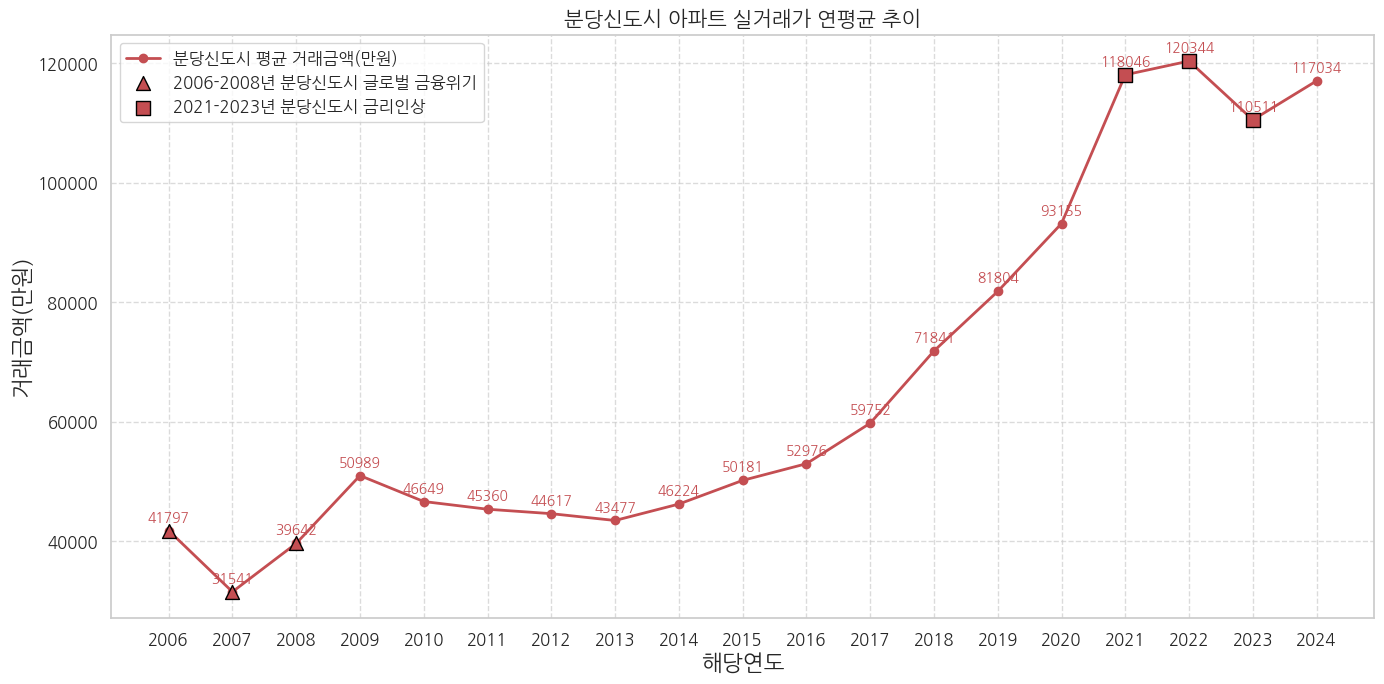

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Seaborn 스타일 설정
sns.set(style='whitegrid')

# 계약년월을 계약년으로 변환
bundang_df['계약년'] = bundang_df['계약년월'] // 100

# 계약년별 거래금액의 평균을 계산
bundang_yearly_avg = bundang_df.groupby('계약년')['거래금액(만원)'].mean()

# 폰트 설정
fontprop = FontProperties(fname='NanumGothic.ttf')

# 분당신도시 아파트 연평균 거래금액 그래프
plt.figure(figsize=(14, 7))
plt.plot(bundang_yearly_avg.index, bundang_yearly_avg.values, marker='o', linestyle='-', color='r', label='분당신도시 평균 거래금액(만원)', linewidth=2)

# 점마다 평균 가격 표시 (분당)
for year, avg_price in bundang_yearly_avg.items():
    plt.text(year, avg_price + 1000, f'{avg_price:.0f}', ha='center', va='bottom', fontproperties=fontprop, fontsize=10, color='r')

# 글로벌 금융위기 표시 (2006년부터 2008년까지)
issue_prices_bundang = [bundang_yearly_avg.get(year, None) for year in issue_years]

for year, price in zip(issue_years, issue_prices_bundang):
    if price:
        plt.scatter(year, price, color='r', s=100, edgecolor='black', zorder=5, marker='^', label='2006-2008년 분당신도시 글로벌 금융위기' if year == issue_years[0] else "")

# 금리인상 시기 표시 (2021년 8월부터 2023년 1월까지)
rate_hike_prices_bundang = [bundang_yearly_avg.get(year, None) for year in rate_hike_years]

for year, price in zip(rate_hike_years, rate_hike_prices_bundang):
    if price:
        plt.scatter(year, price, color='r', s=100, edgecolor='black', zorder=5, marker='s', label='2021-2023년 분당신도시 금리인상' if year == rate_hike_years[0] else "")

plt.title('분당신도시 아파트 실거래가 연평균 추이', fontproperties=fontprop, fontsize=15, fontweight='bold', loc='center')
plt.xlabel('해당연도', fontproperties=fontprop, fontsize=16)
plt.ylabel('거래금액(만원)', fontproperties=fontprop, fontsize=16)
plt.xticks(bundang_yearly_avg.index, rotation=0, fontproperties=fontprop, fontsize=12)
plt.yticks(fontproperties=fontprop, fontsize=12)
plt.legend(prop=fontprop, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [66]:

# 필터링할 지역 리스트 생성
target_ilsan = [
    '경기도 고양시 일산동구 식사동',
    '경기도 고양시 일산동구 중산동',
    '경기도 고양시 일산동구 정발산동',
    #'경기도 고양시 일산동구 풍산동',
    '경기도 고양시 일산동구 백석동',
    '경기도 고양시 일산동구 마두동',
    '경기도 고양시 일산동구 장항동',
    '경기도 고양시 일산서구 일산동',
    '경기도 고양시 일산서구 주엽동',
    '경기도 고양시 일산서구 대화동',
    '경기도 고양시 일산서구 탄현동'
]

# 시군구 컬럼이 target_areas에 포함된 데이터만 필터링
ilsan_df = filtered_df[filtered_df['시군구'].isin(target_ilsan)]

display(ilsan_df.head())
ilsan_df.shape

,시군구,번지,단지명,전용면적(㎡),계약년월,거래금액(만원)
173,경기도 고양시 일산서구 주엽동,136,문촌마을13단지대우,74.460,202312,39300
297,경기도 고양시 일산동구 중산동,1575-4,중산마을11(현대),84.360,202312,30500
304,경기도 고양시 일산서구 주엽동,135,문촌마을15단지부영,40.270,202312,28800
305,경기도 고양시 일산서구 일산동,2125,신원1,84.961,202312,34000
589,경기도 고양시 일산서구 일산동,1048,후곡마을(한진),128.820,202312,73800


(103564, 6)

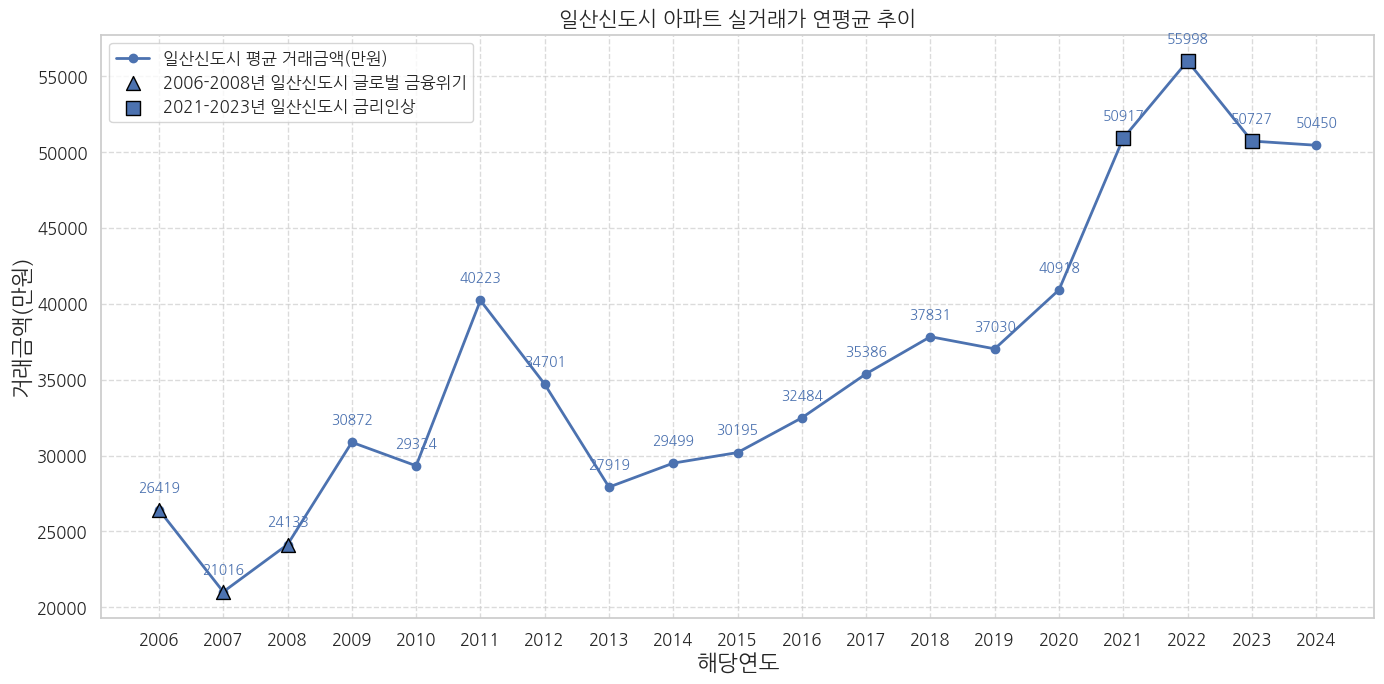

In [97]:
# 그래프 그리기
plt.figure(figsize=(14, 7))

# 일산신도시 아파트 연평균 거래금액 그래프
plt.plot(ilsan_yearly_avg.index, ilsan_yearly_avg.values, marker='o', linestyle='-', color='b', label='일산신도시 평균 거래금액(만원)', linewidth=2)

# 점마다 평균 가격 표시 (일산)
for year, avg_price in ilsan_yearly_avg.items():
    plt.text(year, avg_price + 1000, f'{avg_price:.0f}', ha='center', va='bottom', fontproperties=fontprop, fontsize=10, color='b')

# 글로벌 금융위기 표시 (2006년부터 2008년까지)
issue_years = [2006, 2007, 2008]
issue_prices_ilsan = [ilsan_yearly_avg.get(year, None) for year in issue_years]

for year, price in zip(issue_years, issue_prices_ilsan):
    if price:
        plt.scatter(year, price, color='b', s=100, edgecolor='black', zorder=5, marker='^', label='2006-2008년 일산신도시 글로벌 금융위기' if year == issue_years[0] else "")

# 금리인상 시기 표시 (2021년 8월부터 2023년 1월까지)
rate_hike_years = [2021, 2022, 2023]
rate_hike_prices_ilsan = [ilsan_yearly_avg.get(year, None) for year in rate_hike_years]

for year, price in zip(rate_hike_years, rate_hike_prices_ilsan):
    if price:
        plt.scatter(year, price, color='b', s=100, edgecolor='black', zorder=5, marker='s', label='2021-2023년 일산신도시 금리인상' if year == rate_hike_years[0] else "")

plt.title('일산신도시 아파트 실거래가 연평균 추이', fontproperties=fontprop, fontsize=15, fontweight='bold', loc='center')
plt.xlabel('해당연도', fontproperties=fontprop, fontsize=16)
plt.ylabel('거래금액(만원)', fontproperties=fontprop, fontsize=16)
plt.xticks(ilsan_yearly_avg.index, rotation=0, fontproperties=fontprop, fontsize=12)
plt.yticks(fontproperties=fontprop, fontsize=12)
plt.legend(prop=fontprop, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

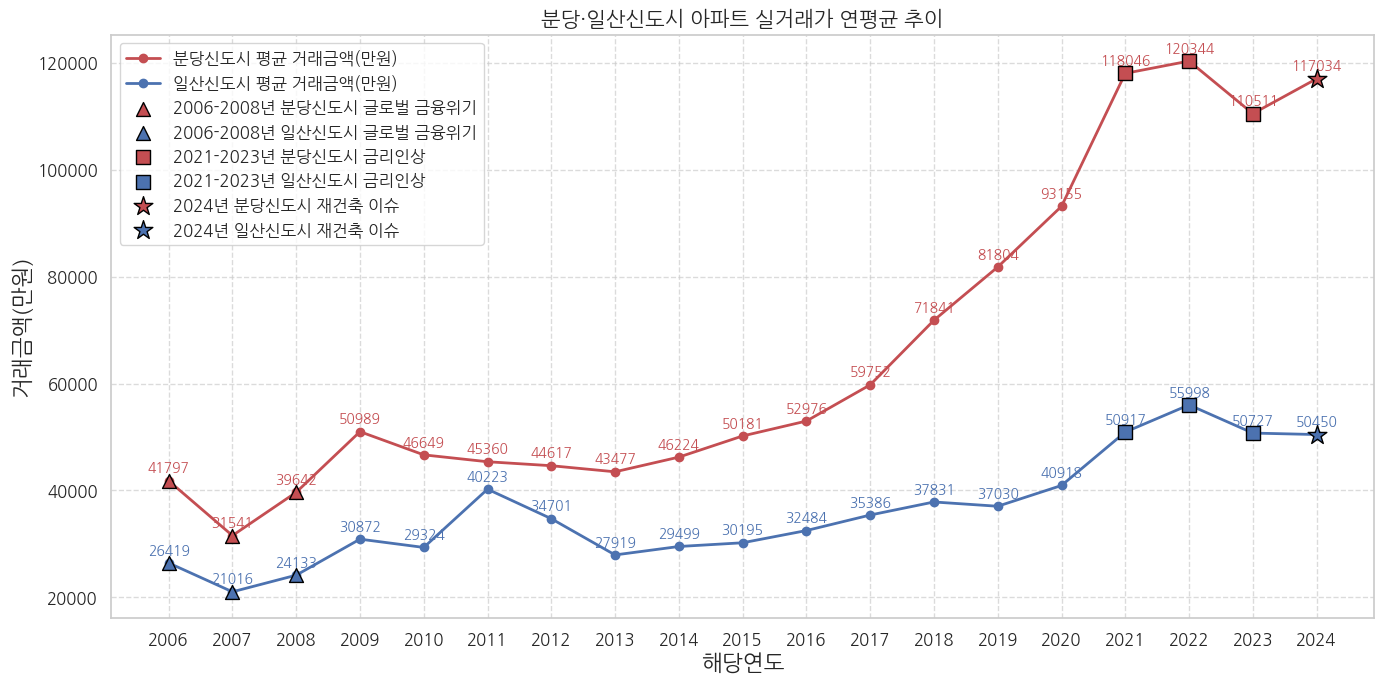

In [101]:
# 그래프 그리기
plt.figure(figsize=(14, 7))

# 분당신도시 아파트 연평균 거래금액 그래프
plt.plot(bundang_yearly_avg.index, bundang_yearly_avg.values, marker='o', linestyle='-', color='r', label='분당신도시 평균 거래금액(만원)', linewidth=2)

# 일산신도시 아파트 연평균 거래금액 그래프
plt.plot(ilsan_yearly_avg.index, ilsan_yearly_avg.values, marker='o', linestyle='-', color='b', label='일산신도시 평균 거래금액(만원)', linewidth=2)

# 점마다 평균 가격 표시 (분당)
for year, avg_price in bundang_yearly_avg.items():
    plt.text(year, avg_price + 1000, f'{avg_price:.0f}', ha='center', va='bottom', fontproperties=fontprop, fontsize=10, color='r')

# 점마다 평균 가격 표시 (일산)
for year, avg_price in ilsan_yearly_avg.items():
    plt.text(year, avg_price + 1000, f'{avg_price:.0f}', ha='center', va='bottom', fontproperties=fontprop, fontsize=10, color='b')

# 글로벌 금융위기 표시 (2006년부터 2008년까지)
issue_years = [2006, 2007, 2008]
issue_prices_bundang = [bundang_yearly_avg.get(year, None) for year in issue_years]
issue_prices_ilsan = [ilsan_yearly_avg.get(year, None) for year in issue_years]

for year, price in zip(issue_years, issue_prices_bundang):
    if price:
        plt.scatter(year, price, color='r', s=100, edgecolor='black', zorder=5, marker='^', label='2006-2008년 분당신도시 글로벌 금융위기' if year == issue_years[0] else "")

for year, price in zip(issue_years, issue_prices_ilsan):
    if price:
        plt.scatter(year, price, color='b', s=100, edgecolor='black', zorder=5, marker='^', label='2006-2008년 일산신도시 글로벌 금융위기' if year == issue_years[0] else "")

# 금리인상 시기 표시 (2021년 8월부터 2023년 1월까지)
rate_hike_years = [2021, 2022, 2023]
rate_hike_prices_bundang = [bundang_yearly_avg.get(year, None) for year in rate_hike_years]
rate_hike_prices_ilsan = [ilsan_yearly_avg.get(year, None) for year in rate_hike_years]

for year, price in zip(rate_hike_years, rate_hike_prices_bundang):
    if price:
        plt.scatter(year, price, color='r', s=100, edgecolor='black', zorder=5, marker='s', label='2021-2023년 분당신도시 금리인상' if year == rate_hike_years[0] else "")

for year, price in zip(rate_hike_years, rate_hike_prices_ilsan):
    if price:
        plt.scatter(year, price, color='b', s=100, edgecolor='black', zorder=5, marker='s', label='2021-2023년 일산신도시 금리인상' if year == rate_hike_years[0] else "")

# 2024년 별 모양 추가 표시 (1기 신도시 재건축 이슈)
reconstruction_year = 2024
reconstruction_price_bundang = bundang_yearly_avg.get(reconstruction_year, None)
reconstruction_price_ilsan = ilsan_yearly_avg.get(reconstruction_year, None)

if reconstruction_price_bundang:
    plt.scatter(reconstruction_year, reconstruction_price_bundang, color='r', s=200, edgecolor='black', zorder=5, marker='*', label='2024년 분당신도시 재건축 이슈')

if reconstruction_price_ilsan:
    plt.scatter(reconstruction_year, reconstruction_price_ilsan, color='b', s=200, edgecolor='black', zorder=5, marker='*', label='2024년 일산신도시 재건축 이슈')

plt.title('분당·일산신도시 아파트 실거래가 연평균 추이', fontproperties=fontprop, fontsize=15, fontweight='bold', loc='center')
plt.xlabel('해당연도', fontproperties=fontprop, fontsize=16)
plt.ylabel('거래금액(만원)', fontproperties=fontprop, fontsize=16)
plt.xticks(bundang_yearly_avg.index, rotation=0, fontproperties=fontprop, fontsize=12)
plt.yticks(fontproperties=fontprop, fontsize=12)
plt.legend(prop=fontprop, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()